In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [124]:
titleratings = pd.read_csv('titleratings.tsv', sep = '\t')
titleepisode = pd.read_csv('titleepisode.tsv', sep = '\t')
titlebasics = pd.read_csv('titlebasics.tsv', sep = '\t')

C:\Users\Wysteria\AppData\Local\Temp\ipykernel_34764\2425729778.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  titlebasics = pd.read_csv('titlebasics.tsv', sep = '\t')


In [125]:
titleratings.head() 

,tconst,averageRating,numVotes
0,tt0000001,5.7,2014
1,tt0000002,5.7,270
2,tt0000003,6.5,1937
3,tt0000004,5.5,178
4,tt0000005,6.2,2712


In [126]:
titleepisode.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16


In [127]:
titlebasics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [128]:
rateepisodes = pd.merge(titleratings, titleepisode)
titleep = pd.merge(rateepisodes, titlebasics)

In [129]:
titleep.head()

,tconst,averageRating,numVotes,parentTconst,seasonNumber,episodeNumber,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0041951,7.6,87,tt0041038,1,9,tvEpisode,The Tenderfeet,The Tenderfeet,0,1949,\N,30,Western
1,tt0042816,7.6,12,tt0989125,1,17,tvEpisode,Othello,Othello,0,1950,\N,135,Drama
2,tt0044093,4.5,18,tt0959862,1,6,tvEpisode,The Three Musketeers,The Three Musketeers,0,1950,\N,60,Drama
3,tt0045960,6.9,190,tt0044284,2,3,tvEpisode,King Lear,King Lear,0,1953,\N,75,"Drama,History,Music"
4,tt0046150,8.2,12,tt0341798,\N,\N,tvEpisode,Othello,Othello,0,1953,\N,84,Drama


In [130]:
titleep = titleep.drop(['parentTconst', 'titleType', 'primaryTitle', 'isAdult', 'endYear', 'tconst'], axis = 1)

In [131]:
titleep.replace("\\N", np.nan, inplace = True)
titleep = titleep.dropna()

In [132]:
titleep.head()

,averageRating,numVotes,seasonNumber,episodeNumber,originalTitle,startYear,runtimeMinutes,genres
0,7.6,87,1,9,The Tenderfeet,1949,30,Western
1,7.6,12,1,17,Othello,1950,135,Drama
2,4.5,18,1,6,The Three Musketeers,1950,60,Drama
3,6.9,190,2,3,King Lear,1953,75,"Drama,History,Music"
5,5.9,164,1,4,A Christmas Carol,1954,60,"Adventure,Drama,Family"


In [133]:
epiratings = titleep.drop(['seasonNumber','originalTitle','startYear','runtimeMinutes','genres'], axis = 1)

In [134]:
epirating = epiratings['episodeNumber'] = epiratings['episodeNumber'].astype(int)

In [135]:
epiratings = epiratings[epiratings['episodeNumber'] <= 100]

<Axes: xlabel='episodeNumber', ylabel='averageRating'>

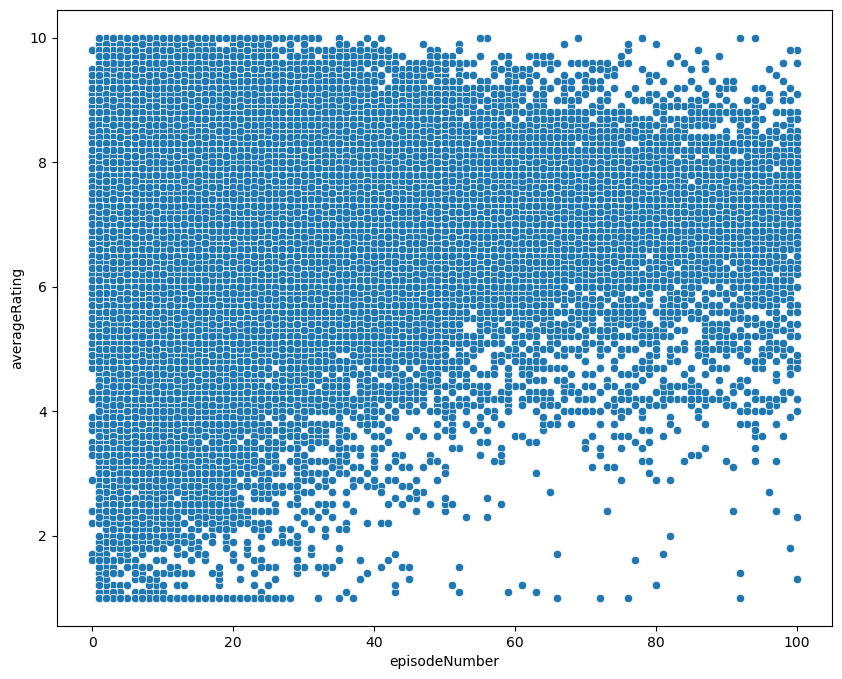

In [136]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = epiratings, x='episodeNumber', y='averageRating')

<Axes: xlabel='averageRating', ylabel='episodeNumber'>

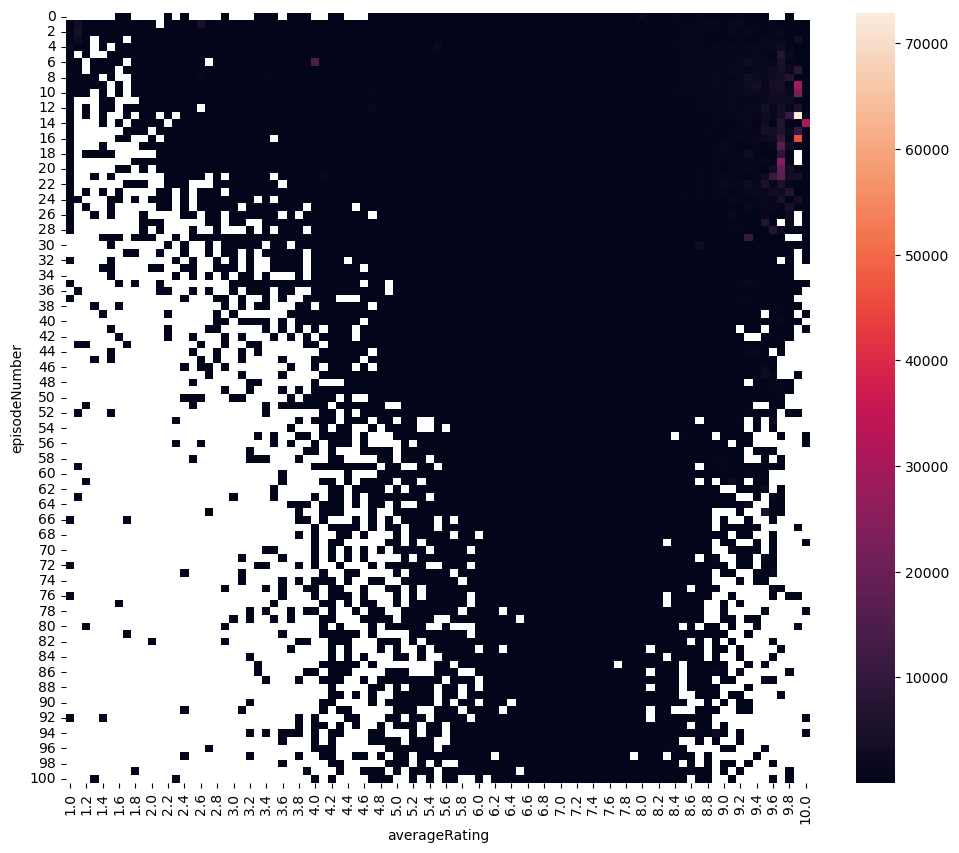

In [137]:
plt.figure(figsize=(12,10))
sns.heatmap(data = epiratings.pivot_table(index='episodeNumber', columns='averageRating', values ='numVotes'))

In [138]:
duration = titleep.drop(['seasonNumber', 'episodeNumber','originalTitle','startYear','genres'], axis = 1)

In [139]:
duration.head()

,averageRating,numVotes,runtimeMinutes
0,7.6,87,30
1,7.6,12,135
2,4.5,18,60
3,6.9,190,75
5,5.9,164,60


In [140]:
duration.averageRating.dtype

dtype('float64')

In [141]:
durationtime = duration['runtimeMinutes'] = duration['runtimeMinutes'].astype(int)

(0.0, 200.0)

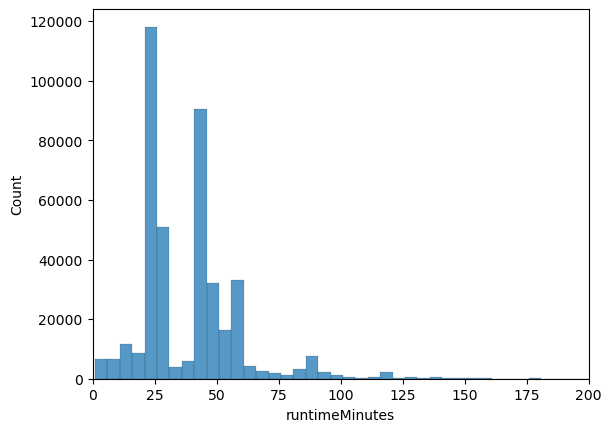

In [142]:
graph = sns.histplot(data=duration, x='runtimeMinutes', binwidth=5)
plt.xlim(0,200)

(0.0, 200.0)

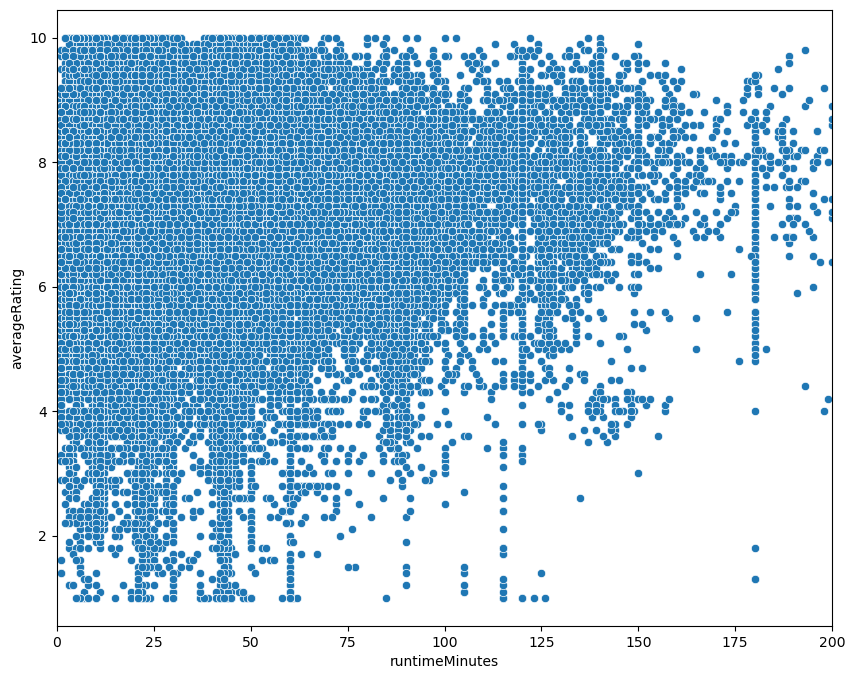

In [143]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = duration, x='runtimeMinutes', y='averageRating')
plt.xlim(0,200)

In [162]:
yearratings = titleep.drop(['numVotes','seasonNumber', 'episodeNumber','originalTitle','runtimeMinutes','genres'], axis = 1)

In [163]:
yearratings.head()

,averageRating,startYear
0,7.6,1949
1,7.6,1950
2,4.5,1950
3,6.9,1953
5,5.9,1954


In [164]:
yearratings.startYear.dtype

dtype('O')

In [165]:
year = yearratings['startYear'] = yearratings['startYear'].astype(int)

In [179]:
yearratings['bin'] = pd.cut(yearratings['startYear'], [1949, 1960, 1970, 1980, 1990, 2000, 2010, 2020, float('inf')], labels = ['1950-1960', '1961-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2020', '2021-Present'])

In [180]:
yearratings = yearratings[yearratings['startYear'] >= 1949]

In [181]:
averages = yearratings.groupby('bin')['averageRating'].mean().head(8)
averages

bin
1950-1960       7.425096
1961-1970       7.414572
1971-1980       7.313742
1981-1990       7.281364
1991-2000       7.299180
2001-2010       7.369994
2011-2020       7.457271
2021-Present    7.421681
Name: averageRating, dtype: float64

(0.0, 10.0)

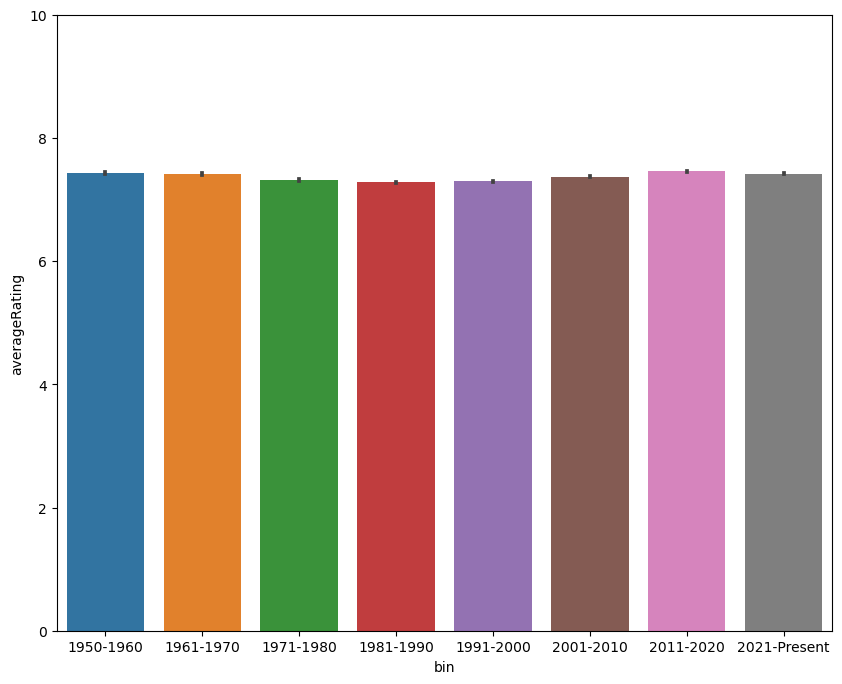

In [182]:
plt.figure(figsize=(10,8))
sns.barplot(data = yearratings, x='bin', y='averageRating')
plt.ylim(0,10)

In [188]:
averageplot = pd.DataFrame({'Year Range': ['1950-1960', '1961-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2020', '2021-Present'], 'Average Rating': [7.425096, 7.414572, 7.313742, 7.281364, 7.299180, 7.369994, 7.457271, 7.421681]}, index = [1,2,3,4,5,6,7,8])

In [190]:
averageplot.head(8)

,Year Range,Average Rating
1,1950-1960,7.425096
2,1961-1970,7.414572
3,1971-1980,7.313742
4,1981-1990,7.281364
5,1991-2000,7.299180
6,2001-2010,7.369994
7,2011-2020,7.457271
8,2021-Present,7.421681


(0.0, 10.0)

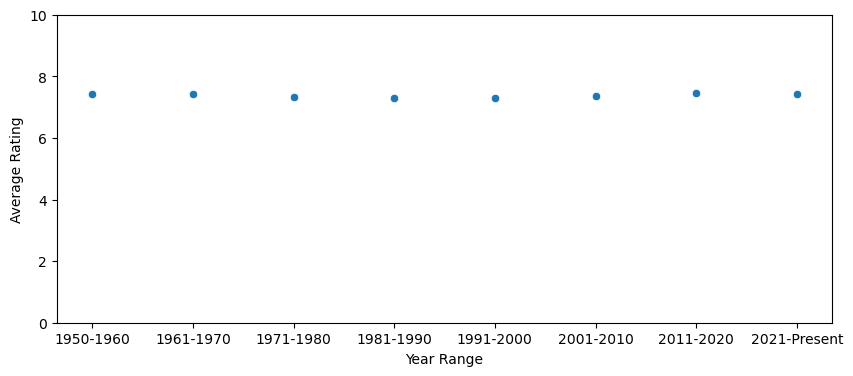

In [193]:
plt.figure(figsize=(10,4))
sns.scatterplot(data = averageplot, x='Year Range', y='Average Rating')
plt.ylim(0,10)